<h1><center> WordClouds </center></h1>

<div style="text-align: right"> Amen Memmi</div>
<div style="text-align: right"> amen.memmi@mail.mcgill.ca</div>
<div style="text-align: right">  ID: 260755070</div>

In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

#### Import the data

In [2]:
data = pd.read_csv('train_input.csv')
data['category'] =  pd.read_csv('train_output.csv')['category']
data = data.drop(columns={'id'})
data.tail()

,conversation,category
164995,"<speaker_1> 2015 nfl draft "" i told you so "" t...",nfl
164996,<speaker_1> pk subban on lundqvist 's <number>...,hockey
164997,<speaker_1> kyrie irving and kevin love had a ...,nba
164998,<speaker_1> miroslav klose has the broken the ...,soccer
164999,<speaker_1> attorney charged with having sex w...,news


The following function is to clean the conversations

In [3]:
def clean_str(s):
    """Clean sentence"""
    for expr in [r"</d>", r"</s>",r"<speaker_1>",r"<speaker_2>",r"[^A-Za-z0-9(),!?\'\`]"]:
        s = re.sub(expr, " ", s)
    for expr in [r"\'s",r"\'ve",r"\'t",r"\'re",r"\'d",r"\'ll",]:
        s = re.sub(expr, " "+expr[1:], s)
    for expr in [r",",r"!",r"\(",r"\)"r"\?"]:
        s = re.sub(expr, " "+expr[1:]+" ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx", s)
    s = re.sub(r'[^\x00-\x7F]+', "", s)
    return s.strip().lower()

In [4]:
data["conversation"] = data["conversation"].apply(lambda x: clean_str(x))

Let's check NBA conversations:

In [5]:
nba_convs = data[data['category']=='nba'].conversation

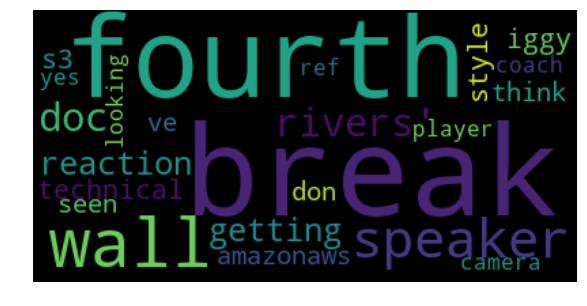

In [6]:
# Start with one conversation:
text = nba_convs.iloc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

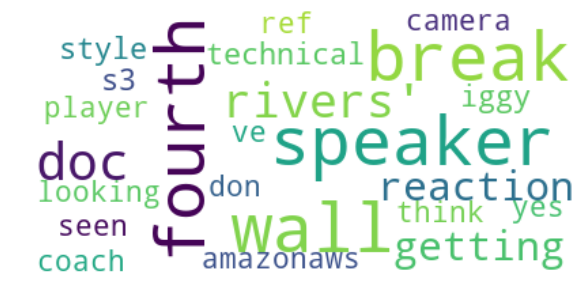

In [7]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
text = " ".join(conv for conv in nba_convs)
print (f"There are {len(text)} words in the combination of all conversations.")

There are 7275939 words in the combination of all conversations.


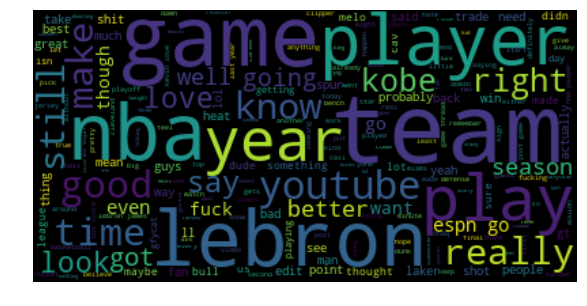

In [9]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["speaker", "now", "yes", "number", "one", "think", "will","twitter","reddit","guy", "re", "don", "imgur"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wow it seams like the king __Lebron__ is all over the place haha in addition to _nba_, _team_, _game_, _player_ and __Kobe__

In [10]:
def generate_cloud(category):
    """ Generate the words cloud for a given category"""
    text = " ".join(conv for conv in data[data['category']==category].conversation)
    stopwords = set(STOPWORDS)
    stopwords.update(["speaker", "now", "yes", "number", "one", "think", "will","twitter","reddit","guy", "re", "don", "imgur"])
    wordcloud = WordCloud(stopwords=stopwords).generate(text)
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [11]:
data['category'].unique()

array(['news', 'nfl', 'soccer', 'movies', 'politics', 'hockey', 'nba',
       'worldnews'], dtype=object)

#### news cloud

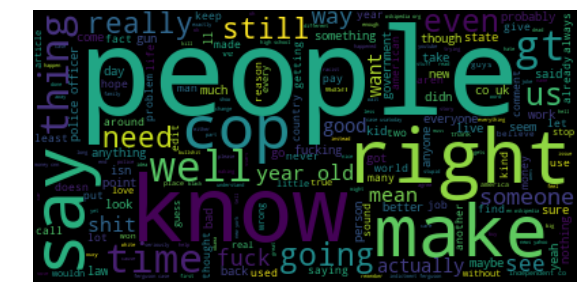

In [12]:
generate_cloud('news')

#### nfl cloud

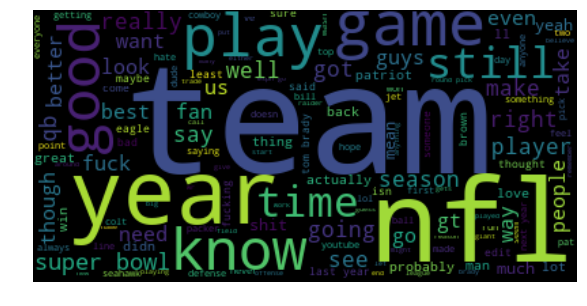

In [13]:
generate_cloud('nfl')

#### soccer cloud

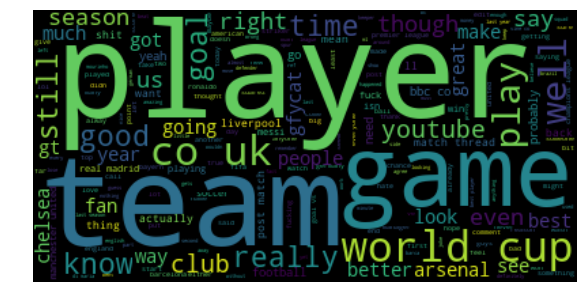

In [14]:
generate_cloud('soccer')

#### movies cloud

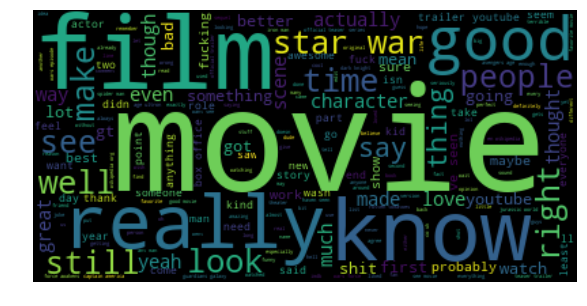

In [15]:
generate_cloud('movies')

#### politics cloud

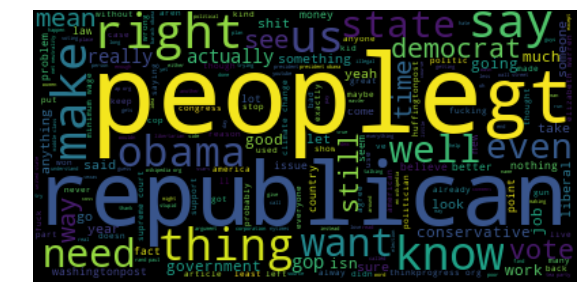

In [16]:
generate_cloud('politics')

#### hockey cloud

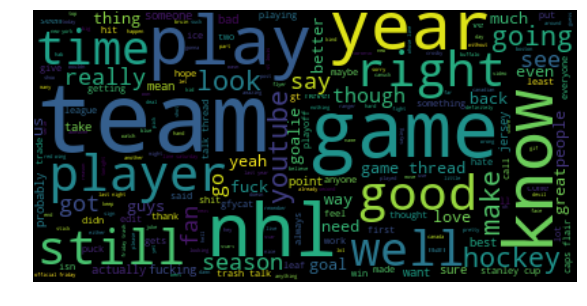

In [17]:
generate_cloud('hockey')

#### nba cloud

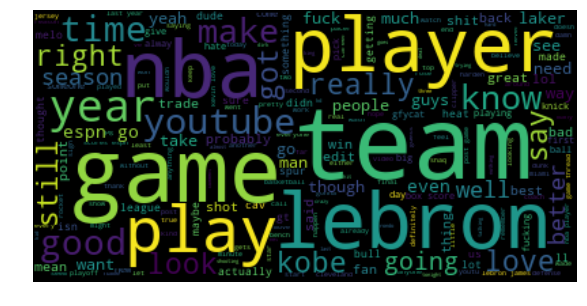

In [18]:
generate_cloud('nba')

#### worldnews cloud

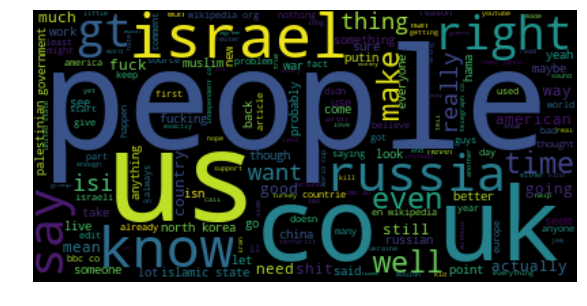

In [19]:
generate_cloud('worldnews')